## Course 5 End-of-course project: Build a multiple linear regression model¶

**The purpose** of this project is to demostrate knowledge of EDA and a multiple linear regression model

**The goal** is to build a multiple linear regression model and evaluate the model

This activity has three parts:

#### Part 1: EDA & Checking Model Assumptions
What are some purposes of EDA before constructing a multiple linear regression model?

#### Part 2: Model Building and evaluation
What resources do you find yourself using as you complete this stage?

#### Part 3: Interpreting Model Results
What key insights emerged from your model(s)?
What business recommendations do you propose based on the models built?

#### **Task 1. Imports and loading**

Import the packages that you've learned are needed for building linear regression models.

In [7]:
pip install numpy pandas matplotlib seaborn statsmodels scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 32.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 34.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 46.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 38.9 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 48.7 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.9/507.9 kB 10.3 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.8/346.8 kB 6.7 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 2.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.5/265.5 kB 6.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [8]:
# Imports
# Packages for numerics and data manipulation
import numpy as np
import pandas as pd

# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for date conversions
import datetime as dt

# Packages for statistical modeling and evaluation
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Matplotlib is building the font cache; this may take a moment.


In [11]:
# Load dataset into dataframe 
df=pd.read_csv("2017_Yellow_Taxi_Trip_Data.csv")

#### **Task 2a. Explore data with EDA**

Analyze and discover data, looking for correlations, missing data, outliers, and duplicates.

In [13]:
# Display basic information about the dataset
print("Dataset Shape:", df.shape)  # Number of rows and columns
print("\nDataset Info:")
print(df.info())  # Column types, non-null counts

Dataset Shape: (22699, 18)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount  

In [14]:
# Check for missing data
print("\nMissing Data:")
print(df.isna().sum())  # Count of missing values in each column


Missing Data:
Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64


In [15]:
# Check for duplicates
print("\nNumber of Duplicates:", df.duplicated().sum())  # Count duplicate rows


Number of Duplicates: 0


In [16]:
# Drop duplicates (if needed)
df_cleaned = df.drop_duplicates()
print("\nDataset Shape after Dropping Duplicates:", df_cleaned.shape)


Dataset Shape after Dropping Duplicates: (22699, 18)


In [19]:
# Summary statistics of numerical columns
print("\nSummary Statistics:")
df.describe().T


Summary Statistics:


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,22699.0,5.675849e+07,3.274493e+07,12127.0,28520556.00,56731504.00,85374524.00,1.134863e+08
VendorID,22699.0,1.556236e+00,4.968384e-01,1.0,1.00,2.00,2.00,2.000000e+00
passenger_count,22699.0,1.642319e+00,1.285231e+00,0.0,1.00,1.00,2.00,6.000000e+00
trip_distance,22699.0,2.913313e+00,3.653171e+00,0.0,0.99,1.61,3.06,3.396000e+01
RatecodeID,22699.0,1.043394e+00,7.083909e-01,1.0,1.00,1.00,1.00,9.900000e+01
PULocationID,22699.0,1.624124e+02,6.663337e+01,1.0,114.00,162.00,233.00,2.650000e+02
DOLocationID,22699.0,1.615280e+02,7.013969e+01,1.0,112.00,162.00,233.00,2.650000e+02
payment_type,22699.0,1.336887e+00,4.962111e-01,1.0,1.00,1.00,2.00,4.000000e+00
fare_amount,22699.0,1.302663e+01,1.324379e+01,-120.0,6.50,9.50,14.50,9.999900e+02
extra,22699.0,3.332746e-01,4.630966e-01,-1.0,0.00,0.00,0.50,4.500000e+00


#### **Task 2b. Convert pickup & dropoff columns to datetime**

In [21]:
# Check the format of the datetime columns
print("\nChecking Data Types Before Conversion:")
print(df[['tpep_pickup_datetime', 'tpep_dropoff_datetime']].dtypes)  # Check column data types


Checking Data Types Before Conversion:
tpep_pickup_datetime     object
tpep_dropoff_datetime    object
dtype: object


In [22]:
# Convert datetime columns to datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], errors='coerce')

In [23]:
# Verify the conversion
print("\nChecking Data Types After Conversion:")
print(df[['tpep_pickup_datetime', 'tpep_dropoff_datetime']].dtypes)


Checking Data Types After Conversion:
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
dtype: object


#### **Task 2c. Create duration column**

In [24]:
# Create `duration` column (in minutes)
df['duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

# Display the first few rows to verify
print(df[['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'duration']].head())

# Check for any negative or zero durations (which may indicate data issues)
print("\nChecking for Negative or Zero Durations:")
print(df[df['duration'] <= 0])


  tpep_pickup_datetime tpep_dropoff_datetime   duration
0  2017-03-25 08:55:43   2017-03-25 09:09:47  14.066667
1  2017-04-11 14:53:28   2017-04-11 15:19:58  26.500000
2  2017-12-15 07:26:56   2017-12-15 07:34:08   7.200000
3  2017-05-07 13:17:59   2017-05-07 13:48:14  30.250000
4  2017-04-15 23:32:20   2017-04-15 23:49:03  16.716667

Checking for Negative or Zero Durations:
       Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
472      52474677         1  2017-06-20 18:57:39   2017-06-20 18:57:39   
795     101135030         1  2017-11-30 07:11:34   2017-11-30 07:11:34   
1205    112363821         1  2017-01-18 17:53:45   2017-01-18 17:53:45   
2440     63574825         1  2017-07-26 22:26:58   2017-07-26 22:26:58   
2740     42450170         1  2017-05-12 12:49:56   2017-05-12 12:49:56   
4171     12399699         1  2017-02-16 20:37:04   2017-02-16 20:37:04   
4742     18394854         1  2017-03-05 06:41:16   2017-03-05 06:41:16   
5630      6520188         1  2

#### **Outliers**

In [25]:
# Display dataset info to identify numerical columns
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

### **Task 2d. Box plots**

Plot a box plot for each feature: trip_distance, fare_amount, duration.

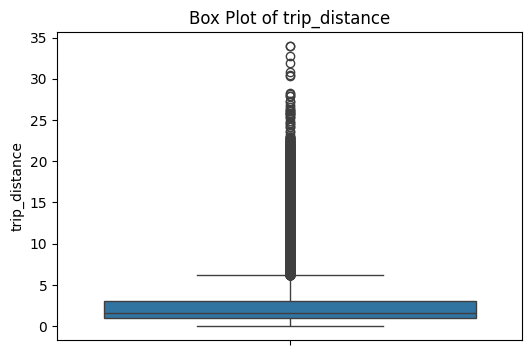

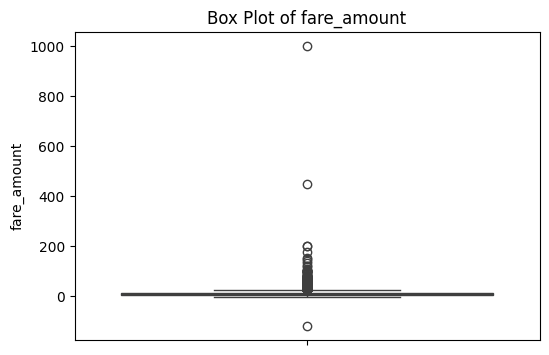

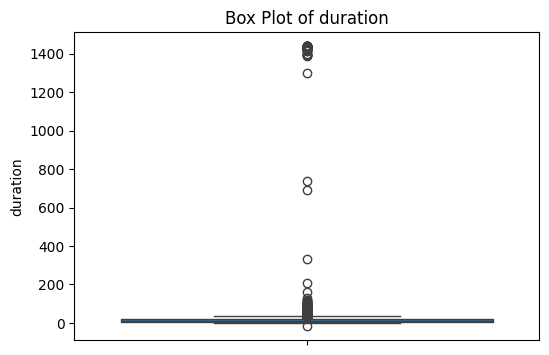

In [27]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Define the columns to plot
columns_to_plot = ["trip_distance", "fare_amount", "duration"]

# Create separate box plots for each feature
for col in columns_to_plot:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col])
    plt.title(f"Box Plot of {col}")
    plt.ylabel(col)
    plt.show()

**Questions:**

Which variable(s) contains outliers? fare_amount and duration have an important amount of outliers. trip_distance has also outliers, but thez are more equiallz distributed

Are the values in the trip_distance column unbelievable? Maximum value is 35 miles, which is reasonable for a long taxi trip

What about the lower end? Do distances, fares, and durations of 0 (or negative values) make sense? There might be cases where distance are verz short, such as a block, which might create neat to zero values.

### **Task 2e. Imputations**

##### `trip_distance` outliers

You know from the summary statistics that there are trip distances of 0. Are these reflective of erroneous data, or are they very short trips that get rounded down?

To check, sort the column values, eliminate duplicates, and inspect the least 10 values. Are they rounded values or precise values?

In [31]:
# Inspect the smallest unique values in the trip_distance column
unique_trip_distances = df["trip_distance"].sort_values().unique()

# Display the smallest 10 unique values
print("Smallest 10 unique trip distances:")
print(unique_trip_distances[:10])

Smallest 10 unique trip distances:
[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09]


In [32]:
# Count the number of rides where trip_distance is zero
zero_distance_count = (df["trip_distance"] == 0).sum()

# Display the result
print(f"Number of rides with zero trip distance: {zero_distance_count}")

Number of rides with zero trip distance: 148


##### `fare_amount` outliers

Question: What do you notice about the values in the `fare_amount` column?

Impute values less than $0 with 0.

In [33]:
# Summary statistics of fare_amount
print("Summary statistics of fare_amount:")
print(df["fare_amount"].describe())

Summary statistics of fare_amount:
count    22699.000000
mean        13.026629
std         13.243791
min       -120.000000
25%          6.500000
50%          9.500000
75%         14.500000
max        999.990000
Name: fare_amount, dtype: float64


In [34]:
# Impute negative fare amounts with 0
df.loc[df["fare_amount"] < 0, "fare_amount"] = 0

In [35]:
# Compute IQR
Q1 = df["fare_amount"].quantile(0.25)
Q3 = df["fare_amount"].quantile(0.75)
IQR = Q3 - Q1

# Define the upper threshold as Q3 + (6 * IQR)
upper_threshold = Q3 + (6 * IQR)

# Impute fare amounts above the upper threshold
df.loc[df["fare_amount"] > upper_threshold, "fare_amount"] = upper_threshold

In [36]:
# Display updated summary statistics
print("\nUpdated summary statistics of fare_amount after imputation:")
print(df["fare_amount"].describe())


Updated summary statistics of fare_amount after imputation:
count    22699.000000
mean        12.897913
std         10.541137
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max         62.500000
Name: fare_amount, dtype: float64


##### `duration` outliers